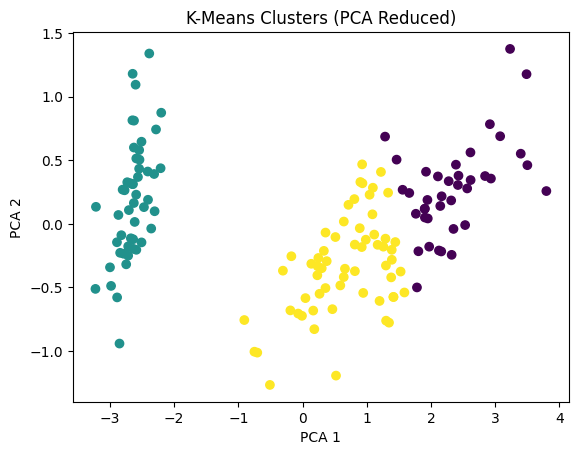

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Load data
iris = load_iris()
X = iris.data
y = iris.target

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("K-Means Clusters (PCA Reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


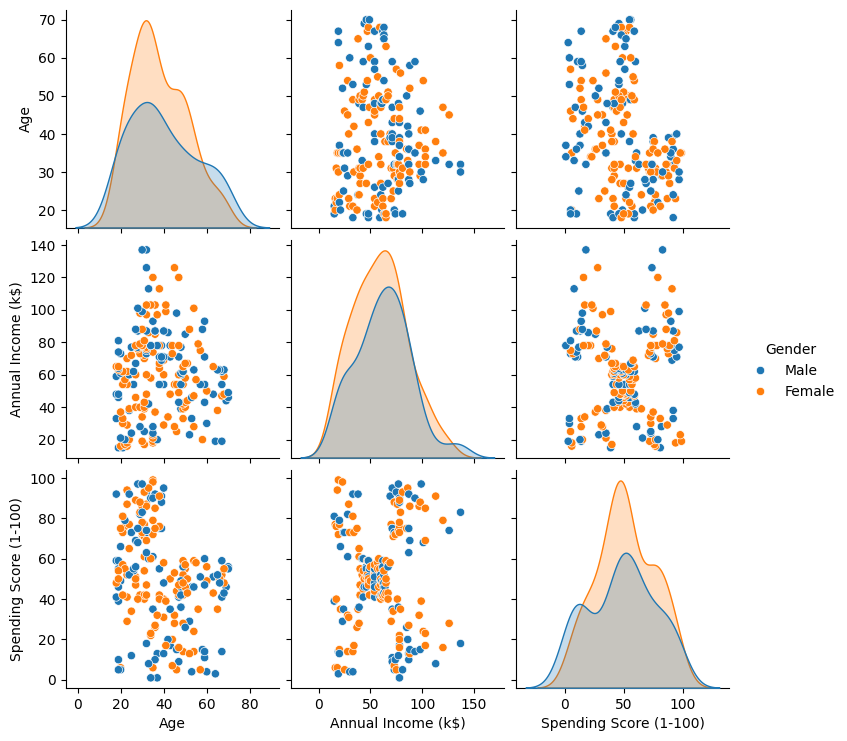

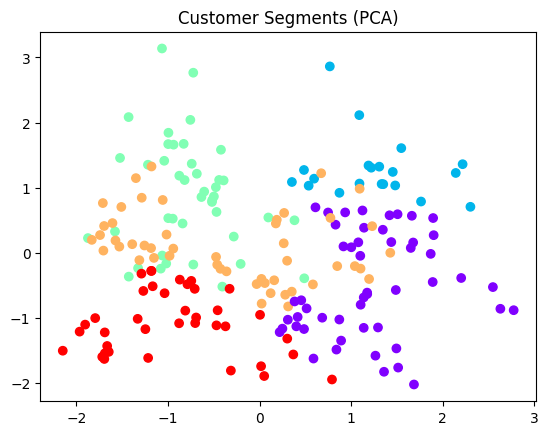

Classification accuracy on clusters: 0.9


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [3]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
df = pd.read_csv("Mall_Customers.csv")

# EDA
print(df.head())
sns.pairplot(df.drop("CustomerID", axis=1), hue="Gender")
plt.show()

# Preprocessing
df_clean = pd.get_dummies(df.drop("CustomerID", axis=1), drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

# K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# PCA Visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['Cluster'], cmap='rainbow')
plt.title("Customer Segments (PCA)")
plt.show()

# Supervised Model: Predicting cluster (optional task)
X = df_clean
y = df['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression(max_iter=300)
clf.fit(X_train, y_train)
print("Classification accuracy on clusters:", clf.score(X_test, y_test))